In [5]:
import pandas as pd
from pandas import Series as sr, DataFrame as df
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks') 
#multiple grid styles in seaborn - whitegrid,darkgrid, white, dark, ticks
%matplotlib inline

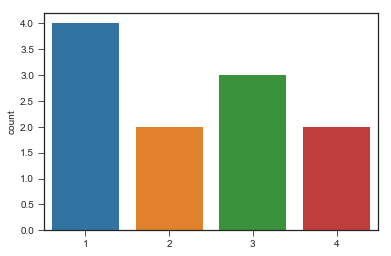

In [7]:
sns.countplot([1,2,3,4,1,2,3,4,3,1,1],data=None)
#notice the ticks on axis

In [23]:
sns.set_style('whitegrid')
#importind datareader of pandas to read from internet the stock data from microsoft,google,apple,amazon
#stock data from google-finances or yahoo-finances
import pandas_datareader.data as web
from datetime import datetime

In [24]:
#start and end date initialized
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [26]:
tech_list = ['AAPL','GOOG','MSFT','AMZN'] #apple,google,microsoft,amazon
#create datasets for each stock data
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end) #create global datasets, reading from yahoo finances

In [27]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,107.900002,108.300003,107.510002,107.699997,105.833153,26880400
2016-09-07,107.830002,108.760002,107.070000,108.360001,106.481720,42364300
2016-09-08,107.250000,107.269997,105.239998,105.519997,103.690956,53002000
2016-09-09,104.639999,105.720001,103.129997,103.129997,101.342369,46557000
2016-09-12,102.650002,105.720001,102.529999,105.440002,103.612335,45292800


In [28]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,133.555675,134.484444,132.708849,133.685119,132.553645,2.960742e+07
std,17.626723,17.630587,17.469946,17.525640,18.006487,1.386780e+07
min,102.650002,105.720001,102.529999,103.129997,101.342369,1.147590e+07
25%,115.800003,116.517498,115.380001,116.042502,114.507868,2.123992e+07
50%,139.004998,139.785004,138.629997,139.169998,138.055778,2.616350e+07
75%,147.252499,148.332501,145.862500,147.574997,146.544754,3.342158e+07
max,164.800003,164.940002,163.630005,164.050003,164.050003,1.119850e+08


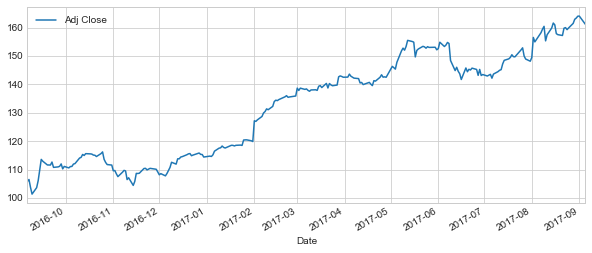

In [29]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend = True ,figsize = (10,4))

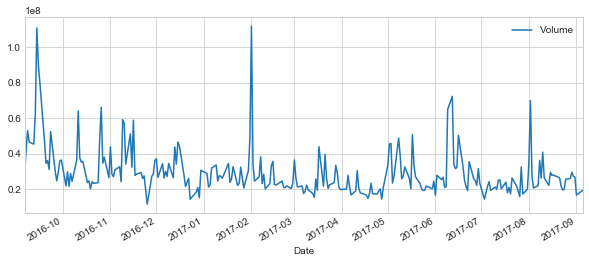

In [30]:
#total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend = True ,figsize = (10,4))

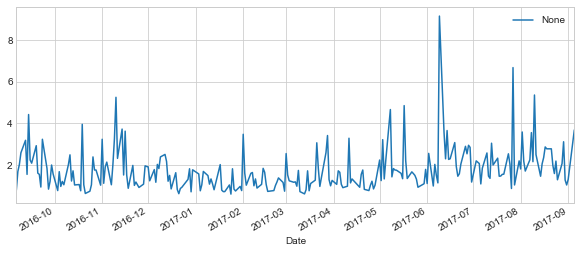

In [31]:
#variatin (High-Low of each day)
(AAPL['High']-AAPL['Low']).plot(legend=True,figsize = (10,4))

In [32]:
AAPL[AAPL.High-AAPL.Low > 4]
#note that peaks > 4 in the graph above and data below match

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-14,108.730003,113.029999,108.599998,111.769997,109.832603,110888700
2016-11-10,111.089996,111.089996,105.830002,107.790001,106.465424,57134500
2017-05-08,149.029999,153.699997,149.029999,153.009995,151.784973,48752400
2017-05-17,153.600006,154.570007,149.710007,150.250000,149.662277,50767700
2017-06-09,155.190002,155.190002,146.020004,148.979996,148.397247,64882700
2017-07-27,153.750000,153.990005,147.300003,150.559998,149.971069,32476300
2017-08-10,159.899994,160.000000,154.630005,155.320007,155.320007,40804300


In [33]:
(AAPL['High']-AAPL.Low).max() #155.190002-146.020004 on 2017-06-09 denotes the global maxima of the graph above

9.1699979999999925

In [34]:
##Moving Average

In [36]:
ma_day = [10,20,50] #moving average for 10,20 and 50 days
for ma in ma_day : 
    col_name = "Mov. Avg. for %s days" %str(ma) 
    AAPL[col_name] = AAPL['Adj Close'].rolling(window = ma).mean() #Create 3 columns for each and computes moving average 

In [37]:
AAPL.head(50)

,Open,High,Low,Close,Adj Close,Volume,Mov. Avg. for 10 days,Mov. Avg. for 20 days,Mov. Avg. for 50 days
Date,,,,,,,,,
2016-09-06,107.900002,108.300003,107.510002,107.699997,105.833153,26880400,NaN,NaN,NaN
2016-09-07,107.830002,108.760002,107.070000,108.360001,106.481720,42364300,NaN,NaN,NaN
2016-09-08,107.250000,107.269997,105.239998,105.519997,103.690956,53002000,NaN,NaN,NaN
2016-09-09,104.639999,105.720001,103.129997,103.129997,101.342369,46557000,NaN,NaN,NaN
2016-09-12,102.650002,105.720001,102.529999,105.440002,103.612335,45292800,NaN,NaN,NaN
2016-09-13,107.510002,108.790001,107.239998,107.949997,106.078827,62176200,NaN,NaN,NaN
2016-09-14,108.730003,113.029999,108.599998,111.769997,109.832603,110888700,NaN,NaN,NaN
2016-09-15,113.860001,115.730003,113.489998,115.570000,113.566742,89983600,NaN,NaN,NaN
2016-09-16,115.120003,116.129997,114.040001,114.919998,112.928009,79886900,NaN,NaN,NaN


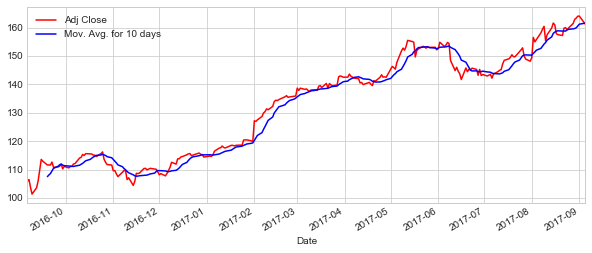

In [40]:
AAPL[['Adj Close','Mov. Avg. for 10 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])

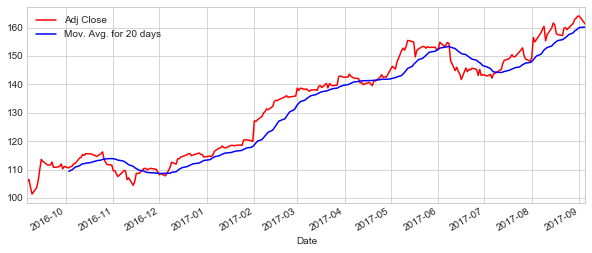

In [41]:
AAPL[['Adj Close','Mov. Avg. for 20 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])

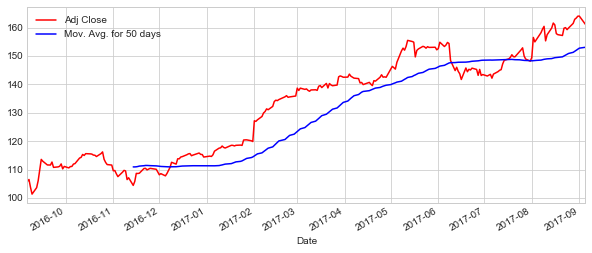

In [42]:
AAPL[['Adj Close','Mov. Avg. for 50 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])